# Climate Effects on Food Supply

## Purpose

To provide an assessment of potential climate change impacts on world crop production.

## Data Description

In the coming decades the agricultural sector faces many challenges stemming from growing global populations, land degradation, and loss of cropland to urbanization. Although food production has been able to keep pace with population growth on the global scale, periodically there are serious regional deficits, and poverty related nutritional deficiencies affect close to a billion people globally. In this century climate change is one factor that could affect food production and availability in many parts of the world, particularly those most prone to drought and famine.

## Research limitation
1. Crop yield change estimates
2. World food trade estimates
3. Global climate models


## Data Preparation and Cleaning

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [21]:
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vTCabKiSUGwqsWeuQyMGwlTPJDDOFm_iRcO9XqRm7OdRv3_dk6q1WbqQQDFHWYeqM6fo3TymabV4GlY/pub?output=xlsx"

In [24]:
data_dict = pd.read_excel(url, sheet_name="dictionary")
data_sheet = pd.read_excel(url, sheet_name="data")

In [25]:
data_dict.head()

,Data filenames,Example,Description
0,BLS_2_Countries_(SRES)_ABBREVNAME,Australia,country name
1,Fips_code,AS,country code
2,WH_2000,20069730.428571,wheat production average 2000 to 2006 in t (FAO)
3,RI_2000,891258.571429,rice production average 2000 to 2006 in t (FAO)
4,MZ_2000,367102.142857,maize production average 2000 to 2006 in t (FAO)


In [27]:
data_sheet.head()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
0,Afghanistan,AF,AFG,2750142.857143,337285.714286,265285.714286,-1.216287,-3.216287,-5.5394,NaN,...,-2.07587,-0.510913,-0.831544,-1.475327,-0.990385,-1.691508,-1.897207,-0.742603,-0.947242,-3.487529
1,Alaska (same as Canada),02,USA,NaN,NaN,NaN,6.532901,4.532901,-0.033331,NaN,...,2.900744,0.648022,1.16276,0.886013,0.386077,1.166232,1.584023,0.745699,0.398874,0.766314
2,Albania,AL,ALB,274685.714286,NaN,212814.285714,4.19423,2.19423,-1.677412,11520.95001,...,2.583197,0.047038,0.567947,0.806724,0.298653,0.486882,1.141646,0.214081,0.564822,1.451985
3,Algeria,AG,DZA,2157083.857143,300.0,1249.142857,1.348337,-0.651663,-4.297889,NaN,...,-2.367421,0.114484,0.235685,-0.218235,-0.288227,-0.873914,-1.598561,0.082848,0.047685,-3.424069
4,Angola,AO,AGO,4000.0,7791.571429,543685.285714,1.348337,-0.651663,-4.297889,NaN,...,-5.411647,-1.599354,-2.362226,-3.211965,-2.412666,-3.427631,-4.352132,-1.812495,-2.531725,-6.431626


In [28]:
data_sheet.sort_values(by=['BLS_2_Countries_(SRES)_ABBREVNAME'])

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
0,Afghanistan,AF,AFG,2750142.857143,337285.714286,265285.714286,-1.216287,-3.216287,-5.5394,NaN,...,-2.07587,-0.510913,-0.831544,-1.475327,-0.990385,-1.691508,-1.897207,-0.742603,-0.947242,-3.487529
1,Alaska (same as Canada),02,USA,NaN,NaN,NaN,6.532901,4.532901,-0.033331,NaN,...,2.900744,0.648022,1.16276,0.886013,0.386077,1.166232,1.584023,0.745699,0.398874,0.766314
2,Albania,AL,ALB,274685.714286,NaN,212814.285714,4.19423,2.19423,-1.677412,11520.95001,...,2.583197,0.047038,0.567947,0.806724,0.298653,0.486882,1.141646,0.214081,0.564822,1.451985
3,Algeria,AG,DZA,2157083.857143,300.0,1249.142857,1.348337,-0.651663,-4.297889,NaN,...,-2.367421,0.114484,0.235685,-0.218235,-0.288227,-0.873914,-1.598561,0.082848,0.047685,-3.424069
4,Angola,AO,AGO,4000.0,7791.571429,543685.285714,1.348337,-0.651663,-4.297889,NaN,...,-5.411647,-1.599354,-2.362226,-3.211965,-2.412666,-3.427631,-4.352132,-1.812495,-2.531725,-6.431626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Western Sahara,WI,MAR,NaN,NaN,NaN,0.141248,-1.858752,-4.181865,0.0,...,-0.081001,-0.024677,-0.031554,-0.058287,-0.036143,-0.051053,-0.074577,-0.029212,-0.041332,-0.095295
161,Yemen,YM,YEM,127936.285714,NaN,43059.428571,-1.216287,-3.216287,-5.5394,-1556.072881,...,-2.545097,-0.645506,-1.120165,-1.746757,-1.157138,-1.976667,-2.246569,-0.891412,-1.234413,-3.856785
162,Zaire,CG,COD,NaN,NaN,NaN,1.401237,-0.598763,-1.598763,0.0,...,-0.102697,0.001151,-0.028693,-0.077721,-0.008504,-0.037972,-0.094377,-0.008106,-0.049865,-0.070289
163,Zambia,ZA,ZMB,96884.428571,14301.0,1015802.714286,1.401237,-0.598763,-1.598763,1357.580749,...,-5.578298,-0.36263,-1.877035,-3.5008,-0.684473,-2.186344,-4.477987,-0.67118,-2.582783,-3.675069


In [29]:
data_sheet.tail()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
161,Yemen,YM,YEM,127936.285714,NaN,43059.428571,-1.216287,-3.216287,-5.5394,-1556.072881,...,-2.545097,-0.645506,-1.120165,-1.746757,-1.157138,-1.976667,-2.246569,-0.891412,-1.234413,-3.856785
162,Zaire,CG,COD,NaN,NaN,NaN,1.401237,-0.598763,-1.598763,0.0,...,-0.102697,0.001151,-0.028693,-0.077721,-0.008504,-0.037972,-0.094377,-0.008106,-0.049865,-0.070289
163,Zambia,ZA,ZMB,96884.428571,14301.0,1015802.714286,1.401237,-0.598763,-1.598763,1357.580749,...,-5.578298,-0.36263,-1.877035,-3.5008,-0.684473,-2.186344,-4.477987,-0.67118,-2.582783,-3.675069
164,Zimbabwe,ZI,ZWE,179285.714286,633.333333,1298482.142857,1.401237,-0.598763,-1.598763,2512.218297,...,-5.400775,-0.309131,-1.794737,-3.396746,-0.630975,-2.104046,-4.363947,-0.617682,-2.500486,-3.561029
165,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080


In [30]:
data_sheet.shape

(166, 157)

In [31]:
data_sheet.columns

Index(['BLS_2_Countries_(SRES)_ABBREVNAME', 'Fips_code', 'ISO3v10', 'WH_2000',
       'RI_2000', 'MZ_2000', 'WHA1F2020', 'RIA1F2020', 'MZA1F2020',
       'ActChWHA1F2020',
       ...
       'A2C2080', 'B1A2020', 'B1A2050', 'B1A2080', 'B2A2020', 'B2A2050',
       'B2A2080', 'B2B2020', 'B2B2050', 'B2B2080'],
      dtype='object', length=157)

In [32]:
data_sheet.isnull().sum()

BLS_2_Countries_(SRES)_ABBREVNAME     0
Fips_code                             0
ISO3v10                               0
WH_2000                              48
RI_2000                              57
                                     ..
B2A2050                               0
B2A2080                               0
B2B2020                               0
B2B2050                               0
B2B2080                               0
Length: 157, dtype: int64

In [33]:
def convert_col_to_list(data):
    mylist = []
    for col in data.columns:
        mylist.append(col)
    return mylist

In [34]:
col_list = convert_col_to_list(data_sheet)

In [35]:
col_to_remove = ['BLS_2_Countries_(SRES)_ABBREVNAME', 'Fips_code', 'ISO3v10', 'COUNTRY']

In [36]:
#We only want the columns with float data
excluded_col = list(set(col_list) - set(col_to_remove))

In [37]:
df_sheet = pd.DataFrame(data_sheet)

In [38]:
#Remove the last row because the it repeats the column names
df_sheet  = df_sheet[:-1]

In [39]:
df_sheet.tail()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
160,Western Sahara,WI,MAR,NaN,NaN,NaN,0.141248,-1.858752,-4.181865,0.0,...,-0.081001,-0.024677,-0.031554,-0.058287,-0.036143,-0.051053,-0.074577,-0.029212,-0.041332,-0.095295
161,Yemen,YM,YEM,127936.285714,NaN,43059.428571,-1.216287,-3.216287,-5.5394,-1556.072881,...,-2.545097,-0.645506,-1.120165,-1.746757,-1.157138,-1.976667,-2.246569,-0.891412,-1.234413,-3.856785
162,Zaire,CG,COD,NaN,NaN,NaN,1.401237,-0.598763,-1.598763,0.0,...,-0.102697,0.001151,-0.028693,-0.077721,-0.008504,-0.037972,-0.094377,-0.008106,-0.049865,-0.070289
163,Zambia,ZA,ZMB,96884.428571,14301.0,1015802.714286,1.401237,-0.598763,-1.598763,1357.580749,...,-5.578298,-0.36263,-1.877035,-3.5008,-0.684473,-2.186344,-4.477987,-0.67118,-2.582783,-3.675069
164,Zimbabwe,ZI,ZWE,179285.714286,633.333333,1298482.142857,1.401237,-0.598763,-1.598763,2512.218297,...,-5.400775,-0.309131,-1.794737,-3.396746,-0.630975,-2.104046,-4.363947,-0.617682,-2.500486,-3.561029


In [40]:
df_sheet.sort_values(by=['BLS_2_Countries_(SRES)_ABBREVNAME'])

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
0,Afghanistan,AF,AFG,2750142.857143,337285.714286,265285.714286,-1.216287,-3.216287,-5.5394,NaN,...,-2.07587,-0.510913,-0.831544,-1.475327,-0.990385,-1.691508,-1.897207,-0.742603,-0.947242,-3.487529
1,Alaska (same as Canada),02,USA,NaN,NaN,NaN,6.532901,4.532901,-0.033331,NaN,...,2.900744,0.648022,1.16276,0.886013,0.386077,1.166232,1.584023,0.745699,0.398874,0.766314
2,Albania,AL,ALB,274685.714286,NaN,212814.285714,4.19423,2.19423,-1.677412,11520.95001,...,2.583197,0.047038,0.567947,0.806724,0.298653,0.486882,1.141646,0.214081,0.564822,1.451985
3,Algeria,AG,DZA,2157083.857143,300.0,1249.142857,1.348337,-0.651663,-4.297889,NaN,...,-2.367421,0.114484,0.235685,-0.218235,-0.288227,-0.873914,-1.598561,0.082848,0.047685,-3.424069
4,Angola,AO,AGO,4000.0,7791.571429,543685.285714,1.348337,-0.651663,-4.297889,NaN,...,-5.411647,-1.599354,-2.362226,-3.211965,-2.412666,-3.427631,-4.352132,-1.812495,-2.531725,-6.431626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Western Sahara,WI,MAR,NaN,NaN,NaN,0.141248,-1.858752,-4.181865,0.0,...,-0.081001,-0.024677,-0.031554,-0.058287,-0.036143,-0.051053,-0.074577,-0.029212,-0.041332,-0.095295
161,Yemen,YM,YEM,127936.285714,NaN,43059.428571,-1.216287,-3.216287,-5.5394,-1556.072881,...,-2.545097,-0.645506,-1.120165,-1.746757,-1.157138,-1.976667,-2.246569,-0.891412,-1.234413,-3.856785
162,Zaire,CG,COD,NaN,NaN,NaN,1.401237,-0.598763,-1.598763,0.0,...,-0.102697,0.001151,-0.028693,-0.077721,-0.008504,-0.037972,-0.094377,-0.008106,-0.049865,-0.070289
163,Zambia,ZA,ZMB,96884.428571,14301.0,1015802.714286,1.401237,-0.598763,-1.598763,1357.580749,...,-5.578298,-0.36263,-1.877035,-3.5008,-0.684473,-2.186344,-4.477987,-0.67118,-2.582783,-3.675069


In [41]:
def impute_missing_vals(data, col_list):
    for i in col_list:
        if data[i].isnull:
            data[i] = data[i].replace(np.nan, 0.0)
            data[i] = data[i].astype(float)
            data[i] = data[i].apply(lambda x: '%.5f' % x)

In [42]:
impute_missing_vals(df_sheet, excluded_col)

In [43]:
df_sheet.isnull().sum()

BLS_2_Countries_(SRES)_ABBREVNAME    0
Fips_code                            0
ISO3v10                              0
WH_2000                              0
RI_2000                              0
                                    ..
B2A2050                              0
B2A2080                              0
B2B2020                              0
B2B2050                              0
B2B2080                              0
Length: 157, dtype: int64

In [44]:
df_sheet.head()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
0,Afghanistan,AF,AFG,2750142.85714,337285.71429,265285.71429,-1.21629,-3.21629,-5.53940,0.00000,...,-2.07587,-0.51091,-0.83154,-1.47533,-0.99039,-1.69151,-1.89721,-0.74260,-0.94724,-3.48753
1,Alaska (same as Canada),02,USA,0.00000,0.00000,0.00000,6.53290,4.53290,-0.03333,0.00000,...,2.90074,0.64802,1.16276,0.88601,0.38608,1.16623,1.58402,0.74570,0.39887,0.76631
2,Albania,AL,ALB,274685.71429,0.00000,212814.28571,4.19423,2.19423,-1.67741,11520.95001,...,2.58320,0.04704,0.56795,0.80672,0.29865,0.48688,1.14165,0.21408,0.56482,1.45198
3,Algeria,AG,DZA,2157083.85714,300.00000,1249.14286,1.34834,-0.65166,-4.29789,0.00000,...,-2.36742,0.11448,0.23568,-0.21824,-0.28823,-0.87391,-1.59856,0.08285,0.04768,-3.42407
4,Angola,AO,AGO,4000.00000,7791.57143,543685.28571,1.34834,-0.65166,-4.29789,0.00000,...,-5.41165,-1.59935,-2.36223,-3.21197,-2.41267,-3.42763,-4.35213,-1.81250,-2.53172,-6.43163


In [45]:
ftr_path = 'data/data.ftr'

In [48]:
#This is super unnecessary but I just wanna try it :P
df_sheet.to_feather(ftr_path)

In [49]:
df2 = pd.read_feather('data/data.ftr')

# Exploratory Data Analysis

In [50]:
df2.head()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
0,Afghanistan,AF,AFG,2750142.85714,337285.71429,265285.71429,-1.21629,-3.21629,-5.53940,0.00000,...,-2.07587,-0.51091,-0.83154,-1.47533,-0.99039,-1.69151,-1.89721,-0.74260,-0.94724,-3.48753
1,Alaska (same as Canada),02,USA,0.00000,0.00000,0.00000,6.53290,4.53290,-0.03333,0.00000,...,2.90074,0.64802,1.16276,0.88601,0.38608,1.16623,1.58402,0.74570,0.39887,0.76631
2,Albania,AL,ALB,274685.71429,0.00000,212814.28571,4.19423,2.19423,-1.67741,11520.95001,...,2.58320,0.04704,0.56795,0.80672,0.29865,0.48688,1.14165,0.21408,0.56482,1.45198
3,Algeria,AG,DZA,2157083.85714,300.00000,1249.14286,1.34834,-0.65166,-4.29789,0.00000,...,-2.36742,0.11448,0.23568,-0.21824,-0.28823,-0.87391,-1.59856,0.08285,0.04768,-3.42407
4,Angola,AO,AGO,4000.00000,7791.57143,543685.28571,1.34834,-0.65166,-4.29789,0.00000,...,-5.41165,-1.59935,-2.36223,-3.21197,-2.41267,-3.42763,-4.35213,-1.81250,-2.53172,-6.43163


In [51]:
df2['MZ%GR'] = df2['MZ%GR'].astype(float)

In [52]:
df2['RI%GR'] = df2['RI%GR'].astype(float)

In [53]:
df2['WH%GR'] = df2['WH%GR'].astype(float)

In [54]:
df2['WH_2000'] = df2['WH_2000'].astype(float)
df2['WH_2000'] = df2['WH_2000'].apply(lambda x: '%.5f' % x)

In [55]:
df2['RI_2000'] = df2['RI_2000'].astype(float)

In [56]:
df2['RI_2000'] = df2['RI_2000'].apply(lambda x: '%.5f' % x)

In [57]:
df2['RI_2000'] = df2['RI_2000'].astype(float)

In [58]:
df2.nlargest(10, ['RI_2000'])

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
30,China,CH,CHN,94879370.28571,1.792107e+08,124781476.71429,-0.22430,-0.92192,-3.29653,-212811.53067,...,1.29400,-0.14796,-0.07844,-0.37725,-0.73431,-0.30600,0.54731,-0.82183,-0.17963,0.75252
68,India,IN,IND,70674928.00000,1.299061e+08,13599800.00000,-4.09953,-6.09953,-7.09953,-2897341.18071,...,-1.09195,-1.02693,-1.00265,-2.34512,-2.00815,-2.16634,-1.86993,-1.44303,-1.47531,-1.07749
69,Indonesia,ID,IDN,0.00000,5.266866e+07,10693671.71429,-1.95375,-1.02376,-3.83095,0.00000,...,0.28869,-0.59533,-0.34615,-1.06067,-0.64170,-0.26722,0.20879,-0.66998,-0.52585,0.04508
10,Bangladesh,BG,BGD,1370010.71429,3.848379e+07,203940.71429,-7.55381,-2.22883,-7.74680,-103488.04180,...,1.50818,-0.83720,-0.39751,-0.31993,-0.88053,-0.27297,0.67604,-1.13264,-1.11662,-0.35925
159,Viet Nam,VM,VNM,0.00000,3.448863e+07,2974528.57143,-2.79999,-0.69503,-1.00873,0.00000,...,1.15060,-0.28099,0.14683,-0.47442,-0.51599,0.00826,0.76614,-0.39247,-0.13983,0.90442
145,Thailand,TH,THA,828.57143,2.765158e+07,4176972.00000,2.75447,0.75447,-0.24553,22.82273,...,-1.32109,-0.19114,0.39631,-0.31228,0.20306,0.46438,0.04951,0.01713,0.10222,0.40149
104,Myanmar,BM,MMR,119814.57143,2.412473e+07,693490.14286,-7.55381,-2.22883,-7.74680,-9050.56818,...,-3.04699,-2.10973,-3.56416,-3.39566,-2.71866,-3.52796,-3.31836,-3.01526,-4.79343,-4.79631
119,Philippines,RP,PHL,0.00000,1.379162e+07,4959951.71429,-1.95375,-1.02376,-3.83095,0.00000,...,-0.21365,-0.69546,-0.62101,-1.29775,-0.76298,-0.54120,-0.15658,-0.78177,-0.80177,-0.31961
19,Brazil,BR,BRA,3892588.57143,1.143744e+07,39665359.42857,-3.42951,-5.42951,0.22958,-133496.85724,...,2.51300,-1.37629,-1.07880,-0.91352,-1.16097,-1.03107,0.17555,-0.72538,-0.74104,-0.02226
77,Japan,JA,JPN,806285.71429,1.099757e+07,160.00000,1.95383,0.83876,5.72934,15753.44442,...,1.15908,0.25121,0.90987,-0.28527,0.04967,0.62150,1.24062,0.04767,0.17842,1.17076


In [59]:
df2['WH_2000'] = df2['WH_2000'].astype(float)

In [60]:
df2.nlargest(10, ['WH_2000'])

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
30,China,CH,CHN,9.487937e+07,1.792107e+08,124781476.71429,-0.22430,-0.92192,-3.29653,-212811.53067,...,1.29400,-0.14796,-0.07844,-0.37725,-0.73431,-0.30600,0.54731,-0.82183,-0.17963,0.75252
68,India,IN,IND,7.067493e+07,1.299061e+08,13599800.00000,-4.09953,-6.09953,-7.09953,-2897341.18071,...,-1.09195,-1.02693,-1.00265,-2.34512,-2.00815,-2.16634,-1.86993,-1.44303,-1.47531,-1.07749
155,United States,US,USA,5.523014e+07,9.501828e+06,0.00000,4.08257,2.08257,0.61883,2254807.90823,...,-1.95463,-0.01853,-0.95090,-1.51736,-0.06300,-0.76937,-0.45283,0.17766,-0.65147,-1.23176
125,Russia,RS,RUS,4.346679e+07,5.365343e+05,2351045.71429,-3.18783,-5.18783,-6.18783,-1385648.12626,...,-0.45926,-1.89372,-1.15025,-2.01154,-1.98594,-1.49791,-1.07081,-1.40001,-2.54676,-1.64197
51,France,FR,FRA,3.575041e+07,1.061309e+05,14831270.57143,4.19423,2.19423,-1.67741,1499454.45398,...,3.25214,0.21622,0.98304,1.32131,0.61865,0.91265,1.58482,0.50530,1.00634,1.97405
26,Canada,CA,CAN,2.314066e+07,0.000000e+00,8726828.57143,6.53290,4.53290,-0.03333,1511756.17055,...,2.90074,0.64802,1.16276,0.88601,0.38608,1.16623,1.58402,0.74570,0.39887,0.76631
56,Germany,GM,DEU,2.229782e+07,0.000000e+00,3643521.57143,4.19423,2.19423,-1.67741,935221.83510,...,3.92114,0.38758,1.39864,1.83870,0.93973,1.33890,2.02844,0.79849,1.44832,2.49643
149,Turkey,TU,TUR,2.014883e+07,4.611429e+05,2915857.14286,2.68547,0.68547,-3.06663,541091.36025,...,3.62615,-0.36133,0.80421,1.27118,0.50718,0.76680,0.98734,0.22200,0.81032,1.98977
7,Australia,AS,AUS,2.006973e+07,8.912586e+05,367102.14286,2.66825,0.54200,-0.33175,535510.99278,...,2.35115,-0.09185,1.11695,1.32416,1.77925,1.07039,1.82048,0.38329,0.14805,1.60036
114,Pakistan,PK,PAK,1.998587e+07,7.287321e+06,2259885.71429,-3.78091,-5.78091,-6.78091,-755648.12233,...,-1.24904,-0.92380,-1.52685,-2.33699,-1.43279,-2.14226,-1.76868,-1.33466,-1.57237,-3.09459


In [61]:
df2['MZ_2000'] = df2['MZ_2000'].astype(float)

In [62]:
df2.nlargest(10, ['MZ_2000'])

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
153,United Arab Emirates,AE,ARE,1.040000e+02,0.000000e+00,2.610141e+08,-1.21629,-3.21629,-5.53940,-1.26494,...,-4.68810,-1.51316,-2.49516,-3.34396,-2.16155,-3.33694,-3.87986,-1.81952,-2.60324,-5.57467
30,China,CH,CHN,9.487937e+07,1.792107e+08,1.247815e+08,-0.22430,-0.92192,-3.29653,-212811.53067,...,1.29400,-0.14796,-0.07844,-0.37725,-0.73431,-0.30600,0.54731,-0.82183,-0.17963,0.75252
19,Brazil,BR,BRA,3.892589e+06,1.143744e+07,3.966536e+07,-3.42951,-5.42951,0.22958,-133496.85724,...,2.51300,-1.37629,-1.07880,-0.91352,-1.16097,-1.03107,0.17555,-0.72538,-0.74104,-0.02226
99,Mexico,MX,MEX,3.062164e+06,2.836399e+05,2.008464e+07,-0.08908,-2.08908,-5.77502,-2727.91478,...,0.00718,-1.97906,-2.80755,-2.64537,-2.31720,-2.79078,-2.04511,-2.25640,-2.68544,-2.53139
5,Argentina,AR,ARG,1.450309e+07,9.147949e+05,1.596805e+07,3.42404,1.42404,-5.07935,496591.52720,...,-0.36036,-0.12736,-0.00699,-0.24269,0.13741,0.56153,0.16579,-0.19174,-0.79204,0.54439
51,France,FR,FRA,3.575041e+07,1.061309e+05,1.483127e+07,4.19423,2.19423,-1.67741,1499454.45398,...,3.25214,0.21622,0.98304,1.32131,0.61865,0.91265,1.58482,0.50530,1.00634,1.97405
68,India,IN,IND,7.067493e+07,1.299061e+08,1.359980e+07,-4.09953,-6.09953,-7.09953,-2897341.18071,...,-1.09195,-1.02693,-1.00265,-2.34512,-2.00815,-2.16634,-1.86993,-1.44303,-1.47531,-1.07749
69,Indonesia,ID,IDN,0.000000e+00,5.266866e+07,1.069367e+07,-1.95375,-1.02376,-3.83095,0.00000,...,0.28869,-0.59533,-0.34615,-1.06067,-0.64170,-0.26722,0.20879,-0.66998,-0.52585,0.04508
74,Italy,IT,ITA,7.313151e+06,1.375956e+06,1.020215e+07,4.19423,2.19423,-1.67741,306730.33860,...,2.28524,-0.07193,0.37359,0.52184,0.13453,0.28816,0.93583,0.04531,0.35968,1.21397
133,South Africa,SF,ZAF,2.087662e+06,3.171429e+03,9.620751e+06,-1.06584,-3.06584,-4.06584,-22251.17580,...,-3.39839,-1.17125,-1.95313,-2.86143,-1.38581,-2.15933,-3.23524,-1.37695,-2.42363,-2.69996


In [63]:
df_RI2000_10 = pd.DataFrame(df2.nlargest(10, ['RI_2000']))
df_WH2000_10 = pd.DataFrame(df2.nlargest(10, ['WH_2000']))
df_MZ2000_10 = pd.DataFrame(df2.nlargest(10, ['MZ_2000']))

In [64]:
df_RI2000_10 = df_RI2000_10.rename(columns={'BLS_2_Countries_(SRES)_ABBREVNAME': 'countries'})
df_WH2000_10 = df_WH2000_10.rename(columns={'BLS_2_Countries_(SRES)_ABBREVNAME': 'countries'})
df_MZ2000_10 = df_MZ2000_10.rename(columns={'BLS_2_Countries_(SRES)_ABBREVNAME': 'countries'})

In [65]:
df_RI2000_10.head()

,countries,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
30,China,CH,CHN,9.487937e+07,1.792107e+08,1.247815e+08,-0.22430,-0.92192,-3.29653,-212811.53067,...,1.29400,-0.14796,-0.07844,-0.37725,-0.73431,-0.30600,0.54731,-0.82183,-0.17963,0.75252
68,India,IN,IND,7.067493e+07,1.299061e+08,1.359980e+07,-4.09953,-6.09953,-7.09953,-2897341.18071,...,-1.09195,-1.02693,-1.00265,-2.34512,-2.00815,-2.16634,-1.86993,-1.44303,-1.47531,-1.07749
69,Indonesia,ID,IDN,0.000000e+00,5.266866e+07,1.069367e+07,-1.95375,-1.02376,-3.83095,0.00000,...,0.28869,-0.59533,-0.34615,-1.06067,-0.64170,-0.26722,0.20879,-0.66998,-0.52585,0.04508
10,Bangladesh,BG,BGD,1.370011e+06,3.848379e+07,2.039407e+05,-7.55381,-2.22883,-7.74680,-103488.04180,...,1.50818,-0.83720,-0.39751,-0.31993,-0.88053,-0.27297,0.67604,-1.13264,-1.11662,-0.35925
159,Viet Nam,VM,VNM,0.000000e+00,3.448863e+07,2.974529e+06,-2.79999,-0.69503,-1.00873,0.00000,...,1.15060,-0.28099,0.14683,-0.47442,-0.51599,0.00826,0.76614,-0.39247,-0.13983,0.90442


In [66]:
sns.set_style("dark")
sns.set_theme()

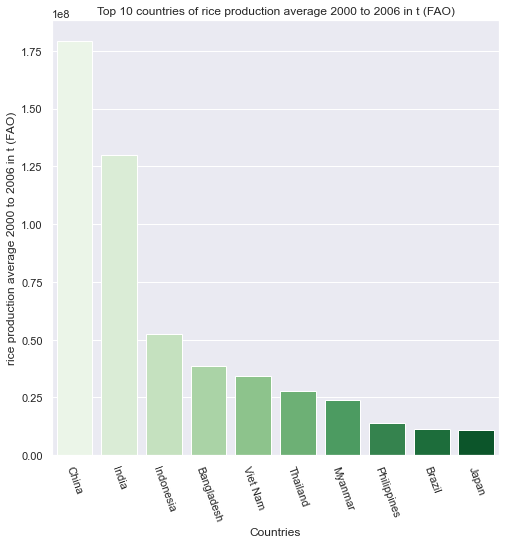

In [69]:
plt.figure(figsize=(8,8))
plot = sns.barplot(data=df_RI2000_10, x='countries', y='RI_2000', palette='Greens')
plt.title('Top 10 countries of rice production average 2000 to 2006 in t (FAO)')
plt.setp(plot.get_xticklabels(), rotation=-70)
plt.xlabel('Countries')
plt.ylabel('rice production average 2000 to 2006 in t (FAO)')
plt.show()

In [68]:
rice_path='data/rice_top_ten.csv'
df_RI2000_10.to_csv(rice_path)

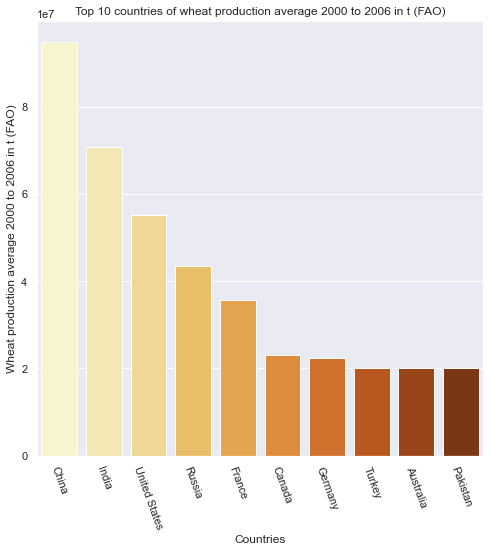

In [71]:
plt.figure(figsize=(8,8))
plot = sns.barplot(data=df_WH2000_10, x='countries', y='WH_2000', palette='YlOrBr')
plt.title('Top 10 countries of wheat production average 2000 to 2006 in t (FAO)')
plt.setp(plot.get_xticklabels(), rotation=-70)
plt.xlabel('Countries')
plt.ylabel('Wheat production average 2000 to 2006 in t (FAO)')
plt.show()

In [72]:
wheat_path='data/wheat_top_ten.csv'
df_WH2000_10.to_csv(wheat_path)

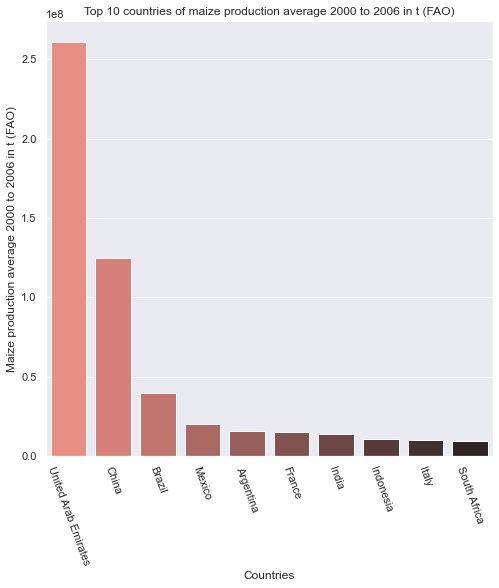

In [73]:
plt.figure(figsize=(8,8))
plot = sns.barplot(data=df_MZ2000_10, x='countries', y='MZ_2000', palette='dark:salmon_r')
plt.title('Top 10 countries of maize production average 2000 to 2006 in t (FAO)')
plt.setp(plot.get_xticklabels(), rotation=-70)
plt.xlabel('Countries')
plt.ylabel('Maize production average 2000 to 2006 in t (FAO)')
plt.show()

In [119]:
maize_path='data/maize_top_ten.csv'
df_MZ2000_10.to_csv(maize_path)

## Map

In [202]:
m = folium.Map(tiles=None)

In [203]:
wms_url = 'https://sedac.ciesin.columbia.edu/geoserver/wms'

In [204]:
def_layer = 'crop-climate-effects-climate-global-food-production:default'

In [205]:
wheat_layer = 'crop-climate-effects-climate-global-food-production:wheat'
maize_layer = 'crop-climate-effects-climate-global-food-production:maize'
rice_layer = 'crop-climate-effects-climate-global-food-production:rice'

In [206]:
folium.raster_layers.WmsTileLayer(
    url=wms_url,
    layers=def_layer,
    fmt='image/png',
    name='default',
    overlay=True,
    control=True,
).add_to(m)

In [207]:
folium.raster_layers.WmsTileLayer(
    url=wms_url,
    layers=wheat_layer,
    fmt='image/png',
    name='wheat',
    overlay=False,
    control=True,
).add_to(m)

folium.raster_layers.WmsTileLayer(
    url=wms_url,
    layers=maize_layer,
    fmt='image/png',
    name='maize',
    overlay=False,
    control=True,
).add_to(m)

folium.raster_layers.WmsTileLayer(
    url=wms_url,
    layers=rice_layer,
    fmt='image/png',
    name='rice',
    overlay=False,
    control=True,
).add_to(m)

In [208]:
folium.LayerControl().add_to(m)

In [209]:
m

In [211]:
import os
m.save(os.path.join('map', 'WMS_result.html'))